# Análisis de videojuegos

**Este proyecto trata sobre el análisis de videojuegos. Se limpiarán y analizarán los datos para identificar tendencias, aplicaremos pruebas y extraeremos conclusiones basadas en nuestros resultados.**

## Información general

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [2]:
# . Carga de datos
data_path = "/datasets/games.csv"  
df = pd.read_csv(data_path)

In [3]:
# 1. Vista preliminar de los datos
print("Vista previa:")
print(df.head())

print("Información del dataset:")
print(df.info())

print("Resumen estadístico de las columnas numéricas:")
print(df.describe())


Vista previa:
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entr

## Preparación de los datos

In [4]:
# Preparación de datos y limpieza de datos iniciales
df.columns = df.columns.str.lower() # Cambiar columnas a minúsculas
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
# Cambiar tipos de datos
# Convertirlos para hacer mas eficiente el análisis 
df['platform'] = df['platform'].astype('str')
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')

print(df.dtypes)

name                 object
platform             object
year_of_release     float64
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score           object
rating             category
dtype: object


In [6]:

# Verificar valores nulos
print("Valores nulos por columna:")
display(df.isnull().sum())
# Verificar valores duplicados
print('Filas dupiladas:')
print(df.duplicated().sum())



Valores nulos por columna:


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Filas dupiladas:
0


In [7]:
# Verificar valores nulos de la columna name
name_nulos = df[df['name'].isnull()]
display(name_nulos)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# investigar motivo de valores nulos en la columna name
name_filtrado = df[(df['platform'] == 'GEN') & (df['year_of_release'] == 1993)]
display(name_filtrado)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Tratamiento de valores nulos en la columna name

Se identificaron 2 valores nulos en la columna name, sin un patrón claro de ausencia. Dado que representan una fracción mínima del dataset y no es posible recuperar la información faltante, se optó por eliminar las filas correspondientes para evitar inconsistencias en el análisis.

In [9]:
# Eliminando las filas que contienen valores nulos en la columna name
df = df.dropna(subset=['name'])


In [10]:
# Verificar valores nulos de la columna years_of_release
year_nulos = df[df['year_of_release'].isnull()]
display(year_nulos)
year_nulos.nunique()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


name               232
platform            16
year_of_release      0
genre               12
na_sales            69
eu_sales            47
jp_sales            26
other_sales         27
critic_score        56
user_score          48
rating               5
dtype: int64

In [11]:
# Eliminar valores ausentes
df['year_of_release'] = df['year_of_release'].dropna() 

* Se ha decidido eliminar los valores ausentes en la columna year_of_release ya que no representan un porcentaje muy grande del total de valores de la misma

In [12]:
# Convertir a Int
df["year_of_release"] = df["year_of_release"].astype("Int64")
df.dtypes


name                 object
platform             object
year_of_release       Int64
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score           object
rating             category
dtype: object

In [13]:
# Analizando critic score
critic_nulos = df[df['critic_score'].isnull()]
display(critic_nulos)
critic_nulos.nunique()
display(df['critic_score'].unique())
# Remplazar los valores ausentes con la media (porque los valores no tienen muchos valores atípicos) para no generar sesgos en nuestros resultados
df["critic_score"] = df["critic_score"].fillna(df['critic_score'].mean()).round(1)

# Mostrar valores unicos de la columna
display(df['critic_score'].unique())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array([76., 69., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 50., 25., 42., 44., 55., 48., 57., 29., 47., 65.,
       54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51., 40.,
       46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23., 24.,
       21., 17., 22., 13.])

In [14]:
# Analizando user score
user_nulos = df[df['user_score'].isnull()]
display(user_nulos)
user_nulos.nunique()
display(df['user_score'].unique())
display(df[df['user_score']== 'tbd'])
# Convertir tbd a Nan
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,69.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,69.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,69.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,69.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,NaN,NaN


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,69.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,69.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,69.0,tbd,E


In [15]:
# Remplazar los valores ausentes con la media (porque los valores no tienen muchos valores atípicos) para no generar sesgos en nuestros resultados
df["user_score"] = df["user_score"].fillna(df['user_score'].mean()).round(1)
# Convertir la columna al tipo de dato float
df["user_score"] = df["user_score"].astype(float)

# mostrar valores unicos de la columna
display(df['user_score'].unique())


array([8. , 7.1, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8, 5.6,
       5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5,
       1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. , 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

In [16]:
# Analizando rating
rating_nulos = df[df['rating'].isnull()]
display(rating_nulos)
# Convertir los valores ausentes en el string "tbd"
df['rating'] = df['rating'].cat.add_categories(["tbd"])
df['rating'] = df['rating'].fillna("tbd")

display(df['rating'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.0,7.1,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,69.0,7.1,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,69.0,7.1,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,69.0,7.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.0,7.1,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69.0,7.1,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.1,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.1,NaN


['E', 'tbd', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Categories (9, object): ['E', 'tbd', 'M', 'T', ..., 'K-A', 'AO', 'EC', 'RP']

* No se encontró ninguna explicación clara de los valores nulos, al ser una variable categorica se decidió dejar reemplazar con el texto 'tbd' para diferenciarlos

In [24]:
# Crear una nueva columna con la suma de las ventas en todas las regiones
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)
df['total_sales'] = df['total_sales'].astype(float)
# Mostrar la nueva columna
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.1,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.0,7.1,tbd,31.38


In [18]:
# Eliminar Valor en el que las ventas son iguales a 0
display(df[df['total_sales'] == 0])
df['total_sales'] = df[df['total_sales'] != 0]
display(df[df['total_sales'] == 0])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,69.0,7.1,tbd,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,69.0,7.1,tbd,0.0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


## Análisis de datos

### Juegos lanzados anualmente

In [19]:
# Juegos lanzados anualmente
games_per_year = df['year_of_release'].value_counts().sort_index()
display(games_per_year)


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

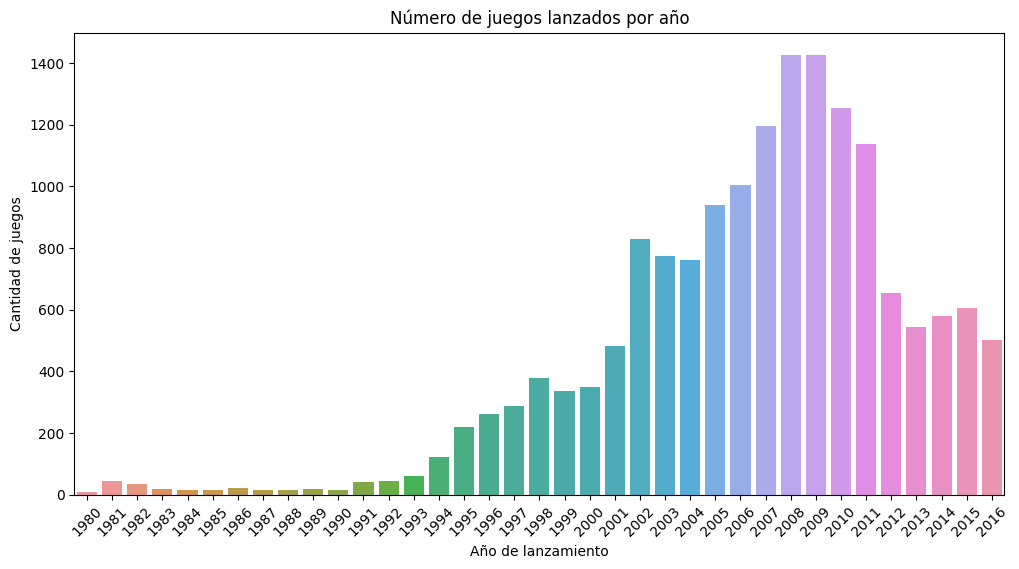

In [20]:
# Graficar la distribución
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values)
sns.set_style('darkgrid')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.title('Número de juegos lanzados por año')
plt.xticks(rotation=45)

plt.show()


In [23]:
print(df[~df['total_sales'].apply(lambda x: isinstance(x, (int, float)))])
print(df.dtypes)


                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

### Ventas por plataforma

In [25]:
# Mustra de las ventas totales basadas en la plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
display(platform_sales)
                    
# Muestra de las 5 plataformas con más ventas
top_five_sales = platform_sales.nlargest(5).reset_index()
display(top_five_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [27]:
# Extraer los nombres de las 5 plataformas más vendidas
top_five_platforms = top_five_sales['platform'].tolist()

# Filtrar el DataFrame original para incluir solo esas plataformas
df_top = df[df['platform'].isin(top_five_platforms)].copy()

# Identificar y eliminar valor atipico que nos estorba para el análisis
display(df_top[df_top['year_of_release']== 1985])
df_top = df_top[df_top['year_of_release'] != 1985]

# Mostrar
display(df_top)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,69.0,7.1,tbd,0.02


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,69.0,7.1,tbd,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,69.0,7.1,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69.0,7.1,tbd,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.0,7.1,tbd,0.01


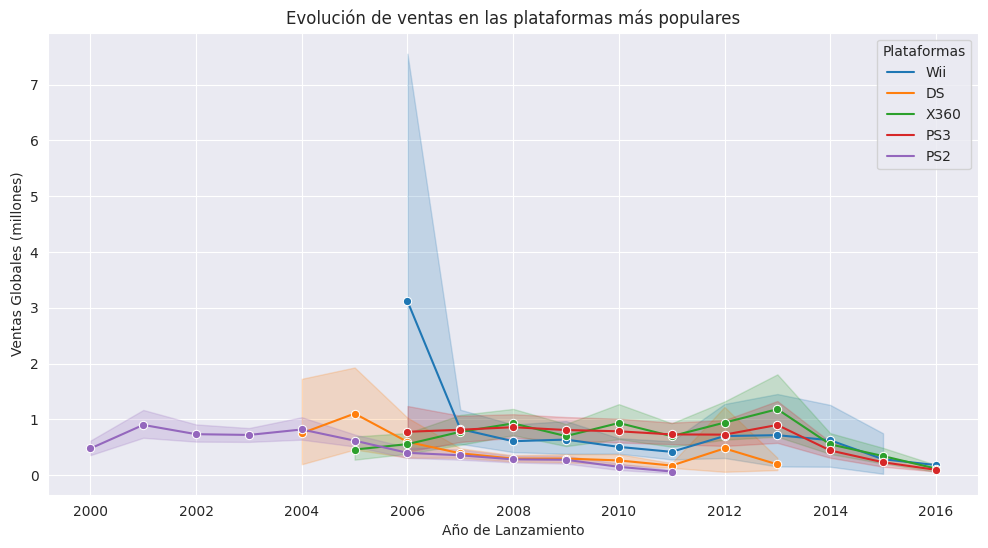

In [35]:
df_top['year_of_release'] = df_top['year_of_release'].astype('int64')

# Estilo
sns.set_style("darkgrid")

# Crear la figura
plt.figure(figsize=(12,6))

# Graficar las ventas por año y plataforma
sns.lineplot(data=df_top, x='year_of_release', y='total_sales', hue='platform', marker='o')

# Personalizar la gráfica
plt.title("Evolución de ventas en las plataformas más populares")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Globales (millones)")
plt.legend(title="Plataformas", loc="upper right")
plt.grid(True)

# Mostrar la gráfica
plt.show()

Podemos observar que las ventas de la plataforma Wii rompieron el estándar en el año de su lanzamiento, generando ventas que no se habían visto. También se puede observar que las plataformas tienen ventas estables en promedio durante 10 años hasta que se renuevan

### Trabajando con un periodo de 10 años

In [36]:
# Con base a la información obtenida se decide trabajar con los datos de los ultimos 10 años para analizar las tendencias
last_10_years = df[df['year_of_release'] >= 2006]
display(last_10_years)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69.0,7.1,tbd,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.0,7.1,tbd,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69.0,7.1,tbd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.1,tbd,0.01


### Eligiendo las plataformas con mayor potencial 

In [37]:
# Calcular las plataformas con más ventas
top_platform_sales = last_10_years.groupby('platform', observed=True)['total_sales'].sum().sort_values(ascending = False).reset_index()
display(top_platform_sales)

,platform,total_sales
0,X360,952.99
1,PS3,931.34
2,Wii,891.18
3,DS,655.35
4,PS4,314.14
5,PS2,265.80
6,3DS,257.81
7,PSP,238.63
8,PC,163.42
9,XOne,159.32


In [38]:
# Agrupar por año y plataforma y sumar las ventas
best_sales = last_10_years.groupby(['year_of_release', 'platform'],observed=True)['total_sales'].sum().unstack()
display(best_sales)
# Calcular el porcentaje de crecimiento año con año
sales_growth = best_sales.pct_change( ).multiply(100).round(2)
display(sales_growth)
# Identificar tendencias
average_growht = sales_growth.mean().sort_values(ascending = False)
display(average_growht)


platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2006,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07


platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,22.64,-35.61,-97.6,225.61,-26.52,249.19,NaN,-15.17,NaN,11.39,NaN,84.83,-94.52,NaN
2008,NaN,100.0,-1.11,0.00,0.0,33.84,-29.07,61.93,NaN,-26.38,NaN,12.14,NaN,41.77,-67.27,NaN
2009,NaN,0.0,-17.73,0.00,0.0,36.15,-51.02,10.47,NaN,9.35,NaN,20.81,NaN,-11.07,0.00,NaN
2010,NaN,0.0,-28.88,0.00,0.0,43.58,-78.64,8.58,NaN,-7.25,NaN,-38.18,NaN,41.35,0.00,NaN
2011,NaN,0.0,-69.21,0.00,0.0,44.28,-92.02,10.28,NaN,-49.14,NaN,-53.38,NaN,-15.40,0.00,NaN
2012,-18.73,0.0,-57.94,0.00,0.0,-33.71,0.00,-31.52,NaN,-56.85,249.68,-63.60,NaN,-30.66,0.00,NaN
2013,10.14,0.0,-86.01,0.00,0.0,-46.68,0.00,5.49,NaN,-59.17,-34.59,-60.43,23.29,-11.19,0.00,NaN
2014,-22.64,0.0,0.00,0.00,0.0,7.27,0.00,-57.83,284.76,-92.36,12.37,-56.34,1.76,-60.78,0.00,185.18


platform
PS4     87.300000
XOne    46.630000
PSV     29.596000
PC      23.612000
PS3     11.321000
DC      11.111111
GBA     -3.561000
GC      -9.760000
X360   -11.401000
XB     -16.179000
WiiU   -18.150000
3DS    -22.650000
DS     -23.824000
PS2    -27.727000
PSP    -34.697000
Wii    -38.140000
dtype: float64

Con base en los recientes análisis realizados se puede observar que las plataformas con más proyección para el año 2017 son el Play Station 4 y el Xbox One

### Diagrama de cajas

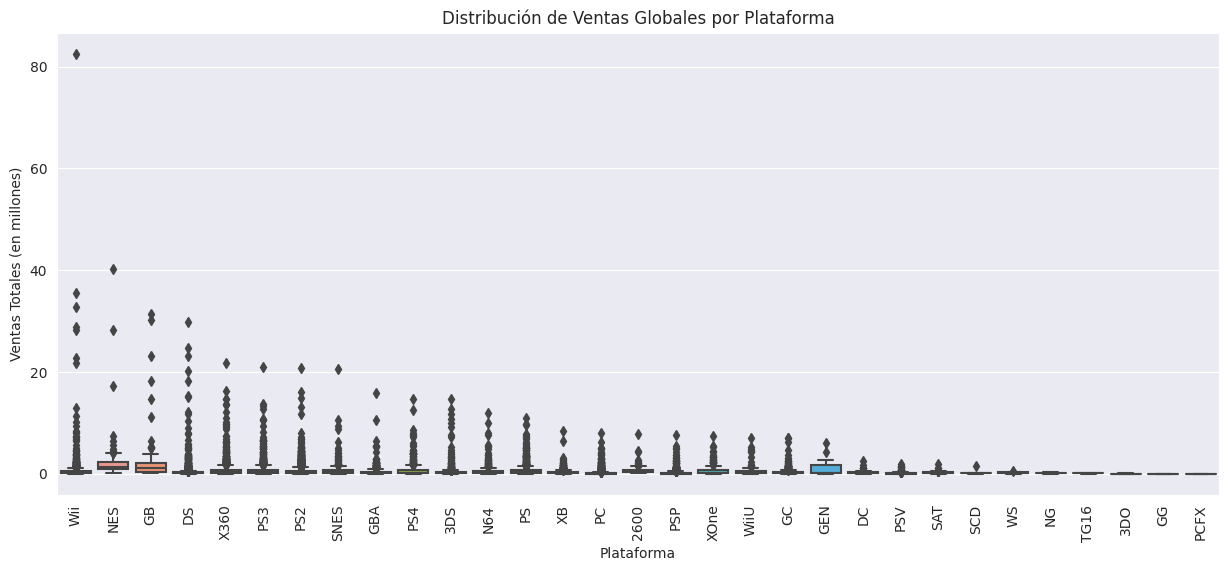

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(15,6))

# Crear el diagrama de caja
sns.boxplot(data=df, x='platform', y='total_sales')

# Ajustar el título y etiquetas
plt.xticks(rotation=90)  # Rotar nombres de plataformas para mejor visibilidad
plt.title("Distribución de Ventas Globales por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (en millones)")

# Mostrar el gráfico
plt.show()


Se observa que las ventas promedio son muy similares en todas las plataformas, pero hay muchos valores atípicos en las plataformas que más venden.

### Análisis de Ps4

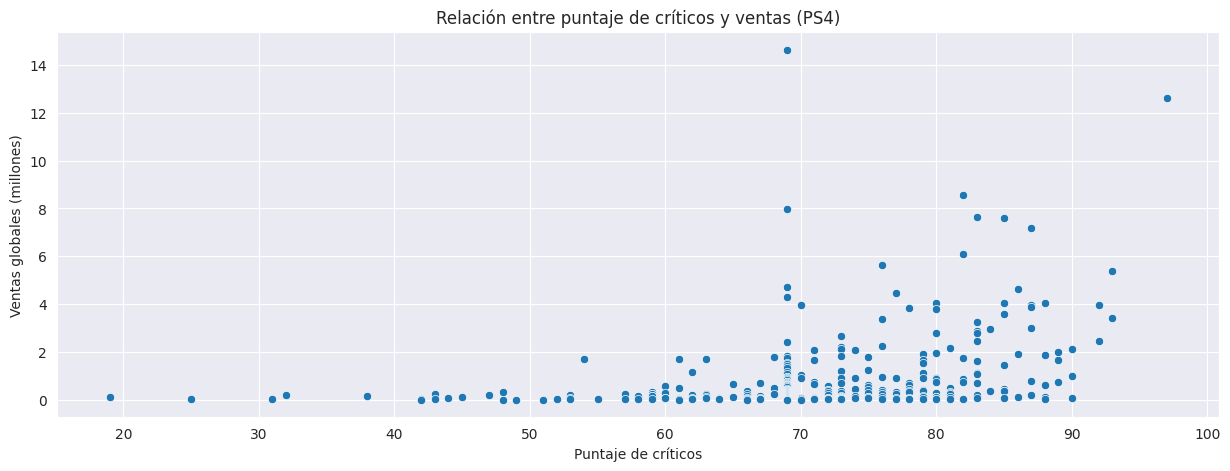

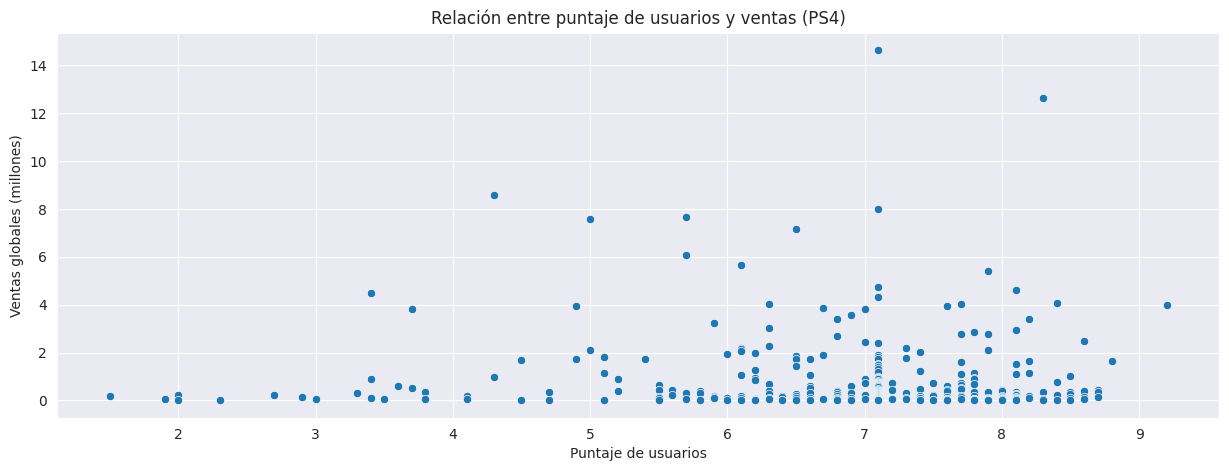

Covarianza entre Puntuación de críticos y Ventas: 5.68
Covarianza entre Puntuación de usuarios y Ventas: -0.08


In [40]:
# Filtrar por plataforma 'PS4' y eliminar valores nulos
ps4_games = df[df['platform'] == 'PS4'][['critic_score', 'user_score', 'total_sales']].dropna()
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión: críticas de expertos vs. ventas
plt.figure(figsize=(15, 5))
sns.scatterplot(x=ps4_games['critic_score'], y=ps4_games['total_sales'])
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas globales (millones)')
plt.title('Relación entre puntaje de críticos y ventas (PS4)')
plt.show()

# Gráfico de dispersión: críticas de usuarios vs. ventas
plt.figure(figsize=(15, 5))
sns.scatterplot(x=ps4_games['user_score'], y=ps4_games['total_sales'])
plt.xlabel('Puntaje de usuarios')
plt.ylabel('Ventas globales (millones)')
plt.title('Relación entre puntaje de usuarios y ventas (PS4)')
plt.show()

# Calcular covarianza
cov_critic_sales = ps4_games['critic_score'].cov(ps4_games['total_sales'])
cov_user_sales = ps4_games['user_score'].cov(ps4_games['total_sales'])

print(f"Covarianza entre Puntuación de críticos y Ventas: {cov_critic_sales:.2f}")
print(f"Covarianza entre Puntuación de usuarios y Ventas: {cov_user_sales:.2f}")




Se observa que la putntuación de los criticos si tiene cierta incidencia con la ventas, por otro lado, las criticas de los usuarios parece no tener relación. Esto pude tener sentido si la puntuación de los criticos se dan antes de lanzar el juego al mercado.

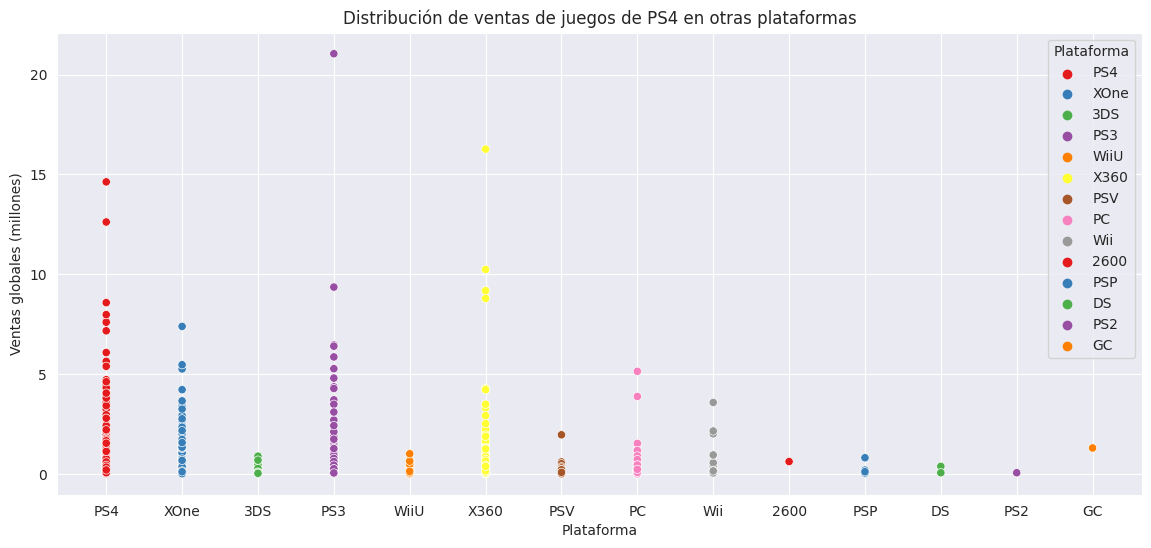

In [41]:
# Filtrar los juegos que están en PS4
ps4_games = df[df['platform'] == 'PS4']['name'].unique()

# Filtrar los mismos juegos en otras plataformas
ps4_comparison = df[df['name'].isin(ps4_games)]

# Filtrar solo las columnas necesarias
ps4_comparison_plot = ps4_comparison.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Gráfico de dispersión
plt.figure(figsize=(14,6))
sns.scatterplot(data=ps4_comparison_plot, x='platform', y='total_sales', hue='platform', palette="Set1")
plt.title("Distribución de ventas de juegos de PS4 en otras plataformas")
plt.ylabel("Ventas globales (millones)")
plt.xlabel("Plataforma")
plt.legend(title="Plataforma")
plt.show()




Se observa que las ventas de los jeugos son similares en las diferentes plataformas.

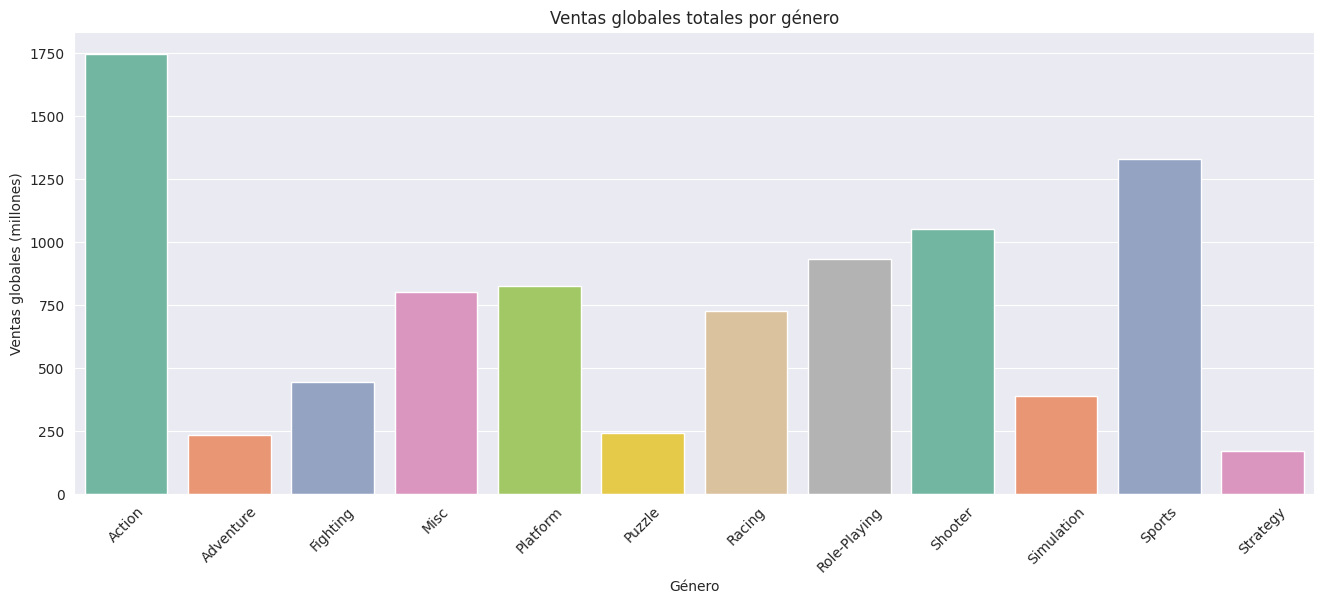

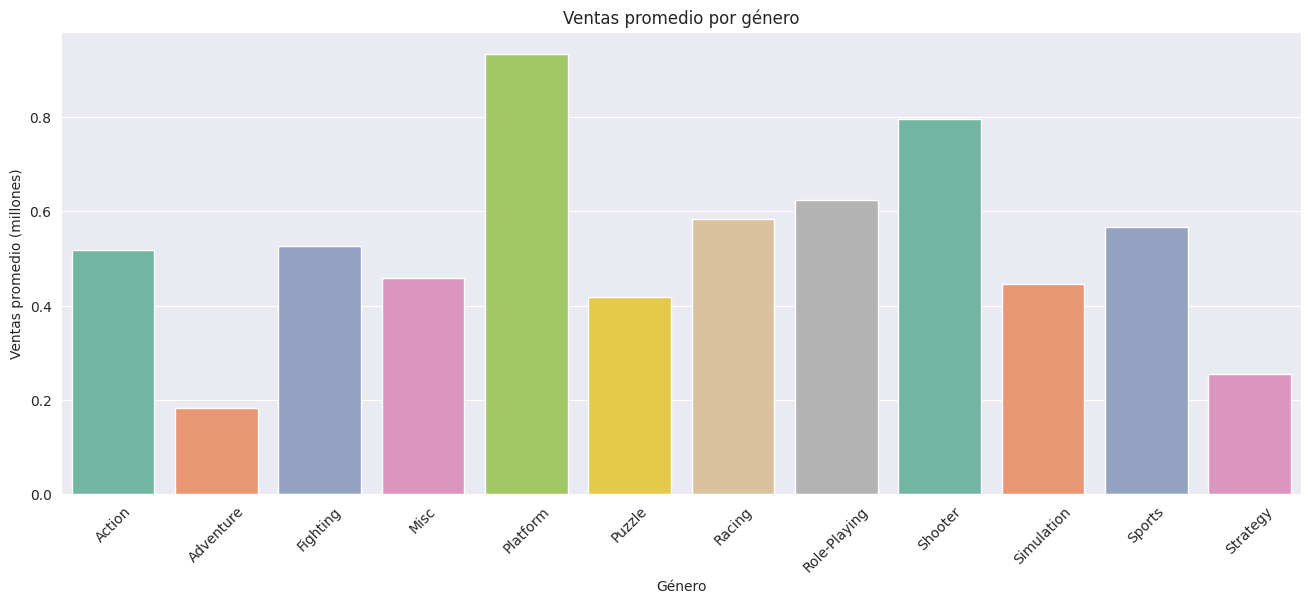

In [42]:
# Agrupar los juegos por género y calcular las ventas globales totales y promedio
genre_sales = df.groupby('genre')['total_sales'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)

# Gráfico de barras para mostrar las ventas totales por género
plt.figure(figsize=(16,6))
sns.barplot(x=genre_sales.index, y=genre_sales['sum'], palette="Set2")
plt.title("Ventas globales totales por género")
plt.ylabel("Ventas globales (millones)")
plt.xlabel("Género")
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para mostrar las ventas promedio por género
plt.figure(figsize=(16,6))
sns.barplot(x=genre_sales.index, y=genre_sales['mean'], palette="Set2")
plt.title("Ventas promedio por género")
plt.ylabel("Ventas promedio (millones)")
plt.xlabel("Género")
plt.xticks(rotation=45)
plt.show()


Se puede observar en la primer grafica que los juegos con más ventas totales son los juegos de acción, esto puede suceder debido a un mayor número de juegos. En la segunda grafica se observa que los juegos de plataforma son los que más venden en promedio, sin importar el número de juegos lanzados. 

### Análisis por región

In [43]:
#Agrupamos los datos por plataforma y sumamos las ventas de cada región
top_platforms_na = df.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().nlargest(5)

print("Top 5 plataformas en NA:\n", top_platforms_na)
print("Top 5 plataformas en EU:\n", top_platforms_eu)
print("Top 5 plataformas en JP:\n", top_platforms_jp)


Top 5 plataformas en NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top 5 plataformas en EU:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top 5 plataformas en JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Se nota la dominación del Nintendo en la región de Japón, mientras que en Norte America y Europa dominan las ventas de las plataformas Xbox y Play Station.

In [44]:
# Los 5 géneros principales
top_genres_na = df.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5)

print("Top 5 géneros en NA:\n", top_genres_na)
print("Top 5 géneros en EU:\n", top_genres_eu)
print("Top 5 géneros en JP:\n", top_genres_jp)


Top 5 géneros en NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Top 5 géneros en EU:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Top 5 géneros en JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


Las 3 regiones mantienen patrones similares, la unica diferencia es que en la región de Japón se prefieren los videojuegos de Role-playing

In [45]:
# Impacto de las clasificaciones
esrb_sales_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Ventas por clasificación ESRB en NA:\n", esrb_sales_na)
print("Ventas por clasificación ESRB en EU:\n", esrb_sales_eu)
print("Ventas por clasificación ESRB en JP:\n", esrb_sales_jp)


Ventas por clasificación ESRB en NA:
 rating
E       1292.99
tbd     1240.68
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64
Ventas por clasificación ESRB en EU:
 rating
E       710.25
tbd     613.30
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64
Ventas por clasificación ESRB en JP:
 rating
tbd     841.93
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


La mayoria de las ventas se concentran en la categoria E (Everyone), puede ser porque la mayoria de los juegos que se lanzan pertenecen a esta.

## Prueba de hipótesis

Formulación de hipótesis:
Hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.
Se usará la prueba estadistica para determinar la diferencia de las medias muestrales de dos poblaciones con un nivel de sgnificancia del 5%

In [51]:
# Filtrar las calificaciones de Xbox One y PC
xbox_one_ratings = df[df['platform'] == 'XOne']['user_score']
pc_ratings = df[df['platform'] == 'PC']['user_score']

# Compara Varianzas haciendo prueba de Levene
var_comparation = st.levene(xbox_one_ratings,pc_ratings)

print(var_comparation)

LeveneResult(statistic=3.8452474469082305, pvalue=0.05011456835504438)


Dado el nivel de significancia de 5% no se puede decir que las varianzas sean diferentes

In [52]:
# Eliminar valores nulos
xbox_one_ratings = xbox_one_ratings.dropna()
pc_ratings = pc_ratings.dropna()

# Establecer el nivel de significancia
alpha = 0.05

# Prueba de hipótesis
results_xbox_pc = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=True)
print(f'Valor P:{results_xbox_pc.pvalue}')
if results_xbox_pc.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales")


Valor P:3.107688668942885e-05
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes


Formulación de hipótesis:
Hipótesis nula: Las calificaciones promedio de los usuarios para el género de Acción y Deportes son iguales.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.
Se usará la prueba estadistica para determinar la diferencia de las medias muestrales de dos poblaciones con un nivel de sgnificancia del 5%

In [54]:
# Filtrar las calificaciones de Acción y Deportes
accion_ratings = df[df['genre'] == 'Action']['user_score']
deportes_ratings = df[df['genre'] == 'Sports']['user_score']

# Eliminar valores nulos
accion_ratings = accion_ratings.dropna()
deportes_ratings = deportes_ratings.dropna()

# Prueba de Levine para saber si las varianzas son iguales
var_comparation = st.levene(accion_ratings, deportes_ratings)
print(var_comparation)


LeveneResult(statistic=0.152672498150227, pvalue=0.6960089589405154)


Dado el nivel de significancia de 5% no se puede decir que las varianzas sean iguales.

In [55]:
# Establecer el nivel de significancia
alpha = 0.05

# Prueba de hipótesis 
results_accion_deportes = st.ttest_ind(accion_ratings, deportes_ratings, equal_var=False)
print(f'Valor p:{results_accion_deportes.pvalue}')
if results_accion_deportes.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales")


Valor p:0.16729860130066568
No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales


## Conclusión General


Tras analizar los datos de ventas y calificaciones de videojuegos, podemos destacar los siguientes hallazgos clave:

Distribución de ventas por género y plataforma:
* Los géneros más rentables varían según la región. En general, los juegos de Acción, Deportes y Disparos (Shooter) tienen las ventas más altas.
* Las plataformas más populares varían por región, con PlayStation y Xbox dominando en América del Norte y Europa, mientras que Nintendo es más fuerte en Japón.

Perfil de usuario por región:
* América del Norte (NA): Prefiere juegos de Acción y Disparos, con Xbox y PlayStation liderando el mercado.
* Europa (EU): Presenta una distribución similar a Norte America, pero con una mayor preferencia por PlayStation.
* Japón (JP): Favorece juegos de Rol (RPG) y plataformas de Nintendo.

Efecto de la clasificación ESRB en las ventas:
* En América del Norte y Europa, los juegos con clasificación "M" (Mature) tienen mayores ventas.
* En Japón, las clasificaciones parecen tener menor impacto, ya que las preferencias están más ligadas a géneros y franquicias locales.

Diferencias en valoraciónes de los usuarios:
* Los jugadores no parecen evaluar los géneros de Acción y Deportes de manera significativamente diferente, lo que indica una posible uniformidad en la percepción de estos juegos.
* Las calificaciones promedio en Xbox One y PC son distintas, lo que sugiere que factores como la optimización, el tipo de público y la experiencia de juego pueden influir en las opiniones de los usuarios.
* La diferencia en la significancia estadística entre ambas pruebas refuerza la importancia de los datos en la toma de decisiones en la industria de los videojuegos.

Proyección de ventas plataformas:
* Las plataformas con mayor proyección para el proximo periodo son el Play Station 4 y el Xbox One.
 



